In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [1]:
df = pd.read_csv('../dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
# outlier의 개수
len(df[df['Class'] == 1])

492

In [11]:
feature_set = df.iloc[:, 1:29]

In [12]:
clf = IsolationForest(n_estimators=50,
                      max_samples=50,
                      contamination=float(0.004),
                      max_features=1.0,
                      bootstrap=False, 
                      n_jobs=-1,
                      random_state=None,
                      verbose=0,
                      behaviour="new")

clf.fit(feature_set)
pred = clf.predict(feature_set)
feature_set['anomaly']=pred
outliers=feature_set.loc[feature_set['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)

#Find the number of anomalies and normal points here points classified -1 are anomalous
print(feature_set['anomaly'].value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


 1    283667
-1      1140
Name: anomaly, dtype: int64


In [13]:
pca = PCA(n_components=3) 
scaler = StandardScaler()

#normalize the metrics
X = scaler.fit_transform(feature_set)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")

# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

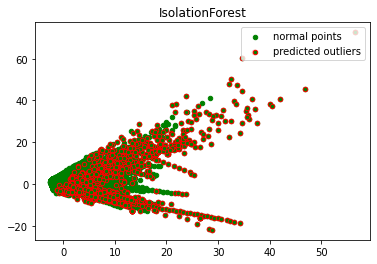

In [14]:
pca = PCA(2)
pca.fit(feature_set)

res = pd.DataFrame(pca.transform(feature_set))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='green', s=20, label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")

plt.legend(loc="upper right")
plt.show()